# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants
import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [3]:
import datahandler


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 6/6 [00:12<00:00,  2.04s/it]


In [4]:
import constants
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

COLOR_PALETTE = constants.COLOR_MAPPING_DEEP

In [5]:
def print_dataframe_info(df_processed, df_enhanced):
    print(f"=== df_processed ===")
    print(f"Number of rows: {len(df_processed)}")
    print(f"Number of columns: {len(df_processed.columns)}")
    print(f"Column names: {df_processed.columns.tolist()}")
    print(f"Number of missing values: {df_processed.isnull().sum().sum()}")
    #print(f"Data types:\n{df_processed.dtypes}")
    #print(f"Basic statistics:\n{df_processed.describe()}")
    
    print("\n=== df_enhanced ===")
    print(f"Number of rows: {len(df_enhanced)}")
    print(f"Number of columns: {len(df_enhanced.columns)}")
    print(f"Column names: {df_enhanced.columns.tolist()}")
    print(f"Number of missing values: {df_enhanced.isnull().sum().sum()}")
    #print(f"Data types:\n{df_enhanced.dtypes}")
    #print(f"Basic statistics:\n{df_enhanced.describe()}")
    
    print("\n=== General Information ===")
    print(f"Number of rows removed from df_processed to df_enhanced: {len(df_processed) - len(df_enhanced)}")

print_dataframe_info(data_loader.processed_incidents_df, data_loader.enhanced_incidents_df)

=== df_processed ===
Number of rows: 754755
Number of columns: 21
Column names: ['id', 'synthetic', 'triage_impression_during_call', 'time_call_received', 'time_call_processed', 'time_ambulance_notified', 'time_dispatch', 'time_arrival_scene', 'time_departure_scene', 'time_arrival_hospital', 'time_available', 'response_time_sec', 'longitude', 'latitude', 'easting', 'northing', 'grid_id', 'grid_row', 'grid_col', 'region', 'urban_settlement']
Number of missing values: 761696

=== df_enhanced ===
Number of rows: 403310
Number of columns: 21
Column names: ['id', 'synthetic', 'triage_impression_during_call', 'time_call_received', 'time_call_processed', 'time_ambulance_notified', 'time_dispatch', 'time_arrival_scene', 'time_departure_scene', 'time_arrival_hospital', 'time_available', 'response_time_sec', 'longitude', 'latitude', 'easting', 'northing', 'grid_id', 'grid_row', 'grid_col', 'region', 'urban_settlement']
Number of missing values: 173041

=== General Information ===
Number of rows 

# Plot

KeyError: 'H'

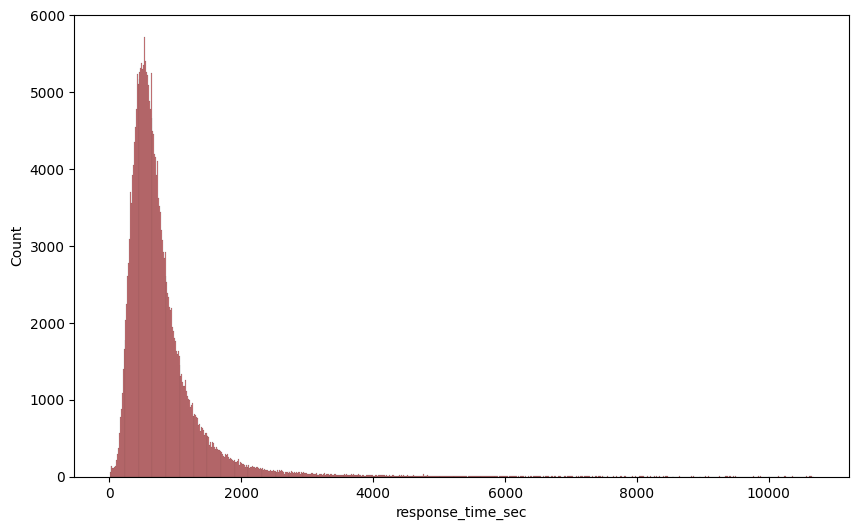

In [6]:
# Initialize figure
plt.figure(figsize=(10, 6))

df = data_loader.processed_incidents_df
triage_counts = df['triage_impression_during_call'].value_counts()

# Pre-filter data for each category and for response_time_sec < 10800
filtered_data = {cat: df[(df['triage_impression_during_call'] == cat) & (df['response_time_sec'] < 10800) & (df['response_time_sec'] > 0)]['response_time_sec'] for cat in triage_counts.index}

# Plot histogram for each category using the custom color palette
for cat in triage_counts.index:
    sns.histplot(filtered_data[cat], kde=False, label=cat, color=COLOR_PALETTE[cat])

# Add labels and title
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times by Triage Category (< 10800 seconds)')
plt.legend(title='Categories')

# Show the plot
plt.show()

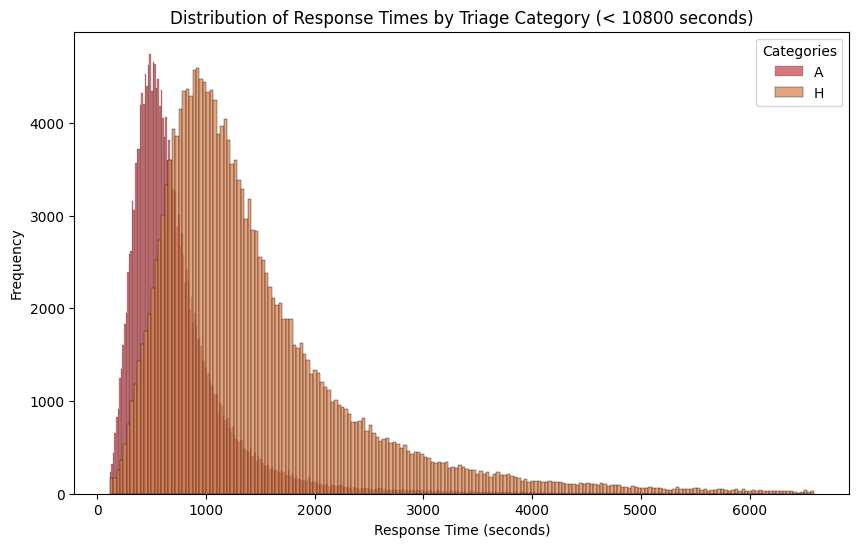

In [ ]:
# Initialize figure
plt.figure(figsize=(10, 6))

df = data_loader.enhanced_incidents_df
triage_counts = df['triage_impression_during_call'].value_counts()

# Pre-filter data for each category and for response_time_sec < 10800
filtered_data = {cat: df[(df['triage_impression_during_call'] == cat) & (df['response_time_sec'] < 10800) & (df['response_time_sec'] > 0)]['response_time_sec'] for cat in triage_counts.index}

# Plot histogram for each category using the custom color palette
for cat in triage_counts.index:
    sns.histplot(filtered_data[cat], kde=False, label=cat, color=COLOR_PALETTE[cat])

# Add labels and title
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times by Triage Category (< 10800 seconds)')
plt.legend(title='Categories')

# Show the plot
plt.show()

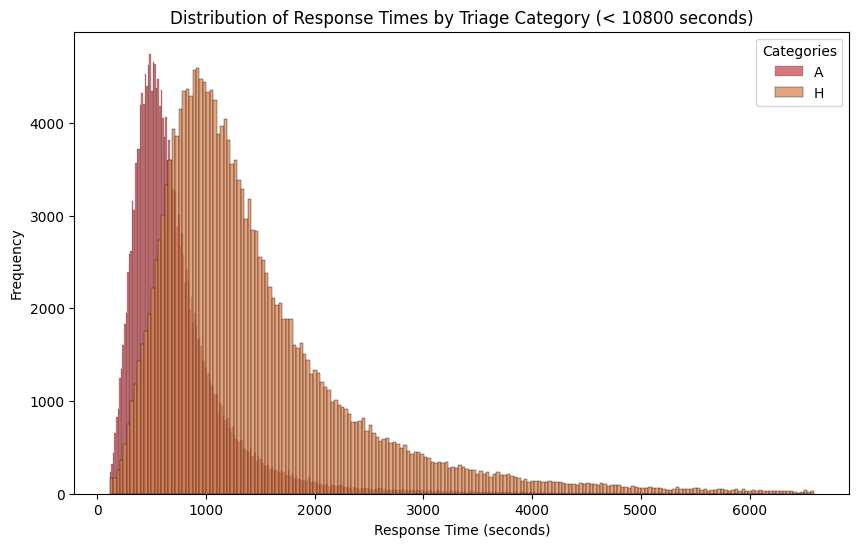

In [ ]:
# Initialize figure
plt.figure(figsize=(10, 6))

new_df = df
categories = ['A', 'H']
# Pre-filter data for each category and for response_time_sec < 10800
filtered_data = {cat: new_df[(new_df['triage_impression_during_call'] == cat) & (new_df['response_time_sec'] < 8000) & (new_df['response_time_sec'] > 0)]['response_time_sec'] for cat in categories}

# Plot histogram for each category using the custom color palette
for cat in categories:
    sns.histplot(filtered_data[cat], kde=False, label=cat, color=COLOR_PALETTE[cat])

# Add labels and title
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times by Triage Category (< 10800 seconds)')
plt.legend(title='Categories')

# Show the plot
plt.show()

In [ ]:
# Sample code to check if there are any rows where time2 is before time1 in a DataFrame
test_df = data_loader.processed_incidents_df

# Initialize a dictionary to store counts of such instances for each pair of time columns
count_dict = {}
time_columns = [
    'time_call_received', 'time_call_processed', 'time_ambulance_notified',
    'time_dispatch', 'time_arrival_scene', 'time_departure_scene',
    'time_arrival_hospital', 'time_available'
]

# Loop through adjacent pairs of time columns to check
for i in range(len(time_columns) - 1):
    col1 = time_columns[i]
    col2 = time_columns[i + 1]
    
    # Count the number of rows where time2 is before time1
    count = len(test_df[test_df[col1] > test_df[col2]])
    
    # Store the count in the dictionary
    count_dict[f"{col2} before {col1}"] = count

count_dict

{'time_call_processed before time_call_received': 69700,
 'time_ambulance_notified before time_call_processed': 7688,
 'time_dispatch before time_ambulance_notified': 13,
 'time_arrival_scene before time_dispatch': 34,
 'time_departure_scene before time_arrival_scene': 2,
 'time_arrival_hospital before time_departure_scene': 2,
 'time_available before time_arrival_hospital': 34}

In [ ]:
import pandas as pd
# Initialize a dictionary to keep the statistics for "good" datetime values
stats_dict_good_values = {}

df_sample = data_loader.enhanced_incidents_df

time_columns = [
    'time_call_received', 'time_call_processed', 'time_ambulance_notified',
    'time_dispatch', 'time_arrival_scene', 'time_departure_scene',
    'time_arrival_hospital', 'time_available'
]
df_sample[time_columns] = df_sample[time_columns].apply(pd.to_datetime, errors='coerce', format="%Y.%m.%dT%H:%M:%S")
        
# Loop through the columns and compare
for i in range(len(time_columns) - 1):
    col1 = time_columns[i]
    col2 = time_columns[i + 1]
    filtered_df_good = df_sample[df_sample[col1] <= df_sample[col2]]
    
    if not filtered_df_good.empty:
        # Calculate the time difference in seconds
        time_diff_series_good = (filtered_df_good[col2] - filtered_df_good[col1]).dt.total_seconds()
        
        # Calculate mean, median, and mode
        mean_time_diff_good = time_diff_series_good.mean()
        median_time_diff_good = time_diff_series_good.median()
        mode_time_diff_good = time_diff_series_good.mode()[0]  # Taking the first mode

        # Store the statistics in the dictionary
        stats_dict_good_values[f"{col1} <= {col2}"] = {
            'mean': mean_time_diff_good,
            'median': median_time_diff_good,
            'mode': mode_time_diff_good
        }

# Display the statistics for "good" datetime values
stats_dict_good_values

{'time_call_received <= time_call_processed': {'mean': 246.0864173960477,
  'median': 109.0,
  'mode': 47.0},
 'time_call_processed <= time_ambulance_notified': {'mean': 226.5440058515782,
  'median': 57.0,
  'mode': 56.0},
 'time_ambulance_notified <= time_dispatch': {'mean': 77.83296223748481,
  'median': 66.0,
  'mode': 4.0},
 'time_dispatch <= time_arrival_scene': {'mean': 541.917663831792,
  'median': 456.0,
  'mode': 456.0},
 'time_arrival_scene <= time_departure_scene': {'mean': 1294.5422947170296,
  'median': 1156.0,
  'mode': 2.0},
 'time_departure_scene <= time_arrival_hospital': {'mean': 908.1417925670937,
  'median': 761.0,
  'mode': 2.0},
 'time_arrival_hospital <= time_available': {'mean': 2020.6837445018168,
  'median': 906.5,
  'mode': 2.0}}

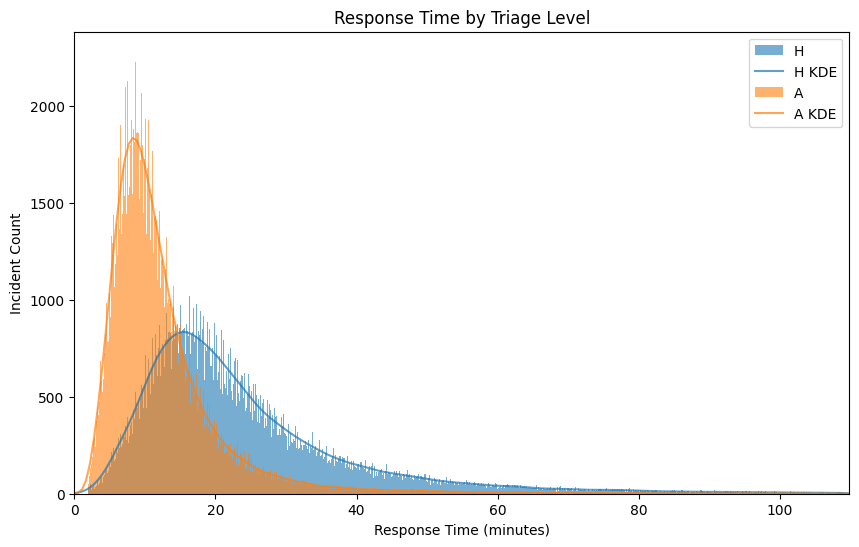

In [ ]:
from scipy.stats import gaussian_kde
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = data_loader.enhanced_incidents_df
df['response_time_min'] = df['response_time_sec'] / 60

# Create the figure and axis objects
plt.figure(figsize=(10, 6))

colors = sns.color_palette()

# Color mapping
color_mapping = {
    'H': colors[0],  # First color in the palette (usually blue)
    'A': colors[1]   # Second color in the palette (usually orange)
}
kde_color_mapping = {
    'H': sns.dark_palette(colors[0], 3)[-1],  # Darker variant of the first color
    'A': sns.dark_palette(colors[1], 3)[-1]   # Darker variant of the second color
}

# Define bin range and bin width
bin_width = 0.1
max_response_time = df['response_time_min'].max()
bin_range = np.arange(0, max_response_time + bin_width, bin_width)

# Initialize an empty list to collect the maximum y-values from the histogram
max_y_values = []

# Loop through each unique Triage Level to plot its corresponding Response Time
for level in df['triage_impression_during_call'].unique():
    subset = df[df['triage_impression_during_call'] == level]
    
    # Plot the histogram and collect the maximum y-value
    counts, _, _ = plt.hist(subset['response_time_min'], bins=bin_range, density=False, alpha=0.6, 
                            label=level, color=color_mapping.get(level, 'grey'))
    max_y_values.append(max(counts))
    
    # Compute and plot the KDE
    kde = gaussian_kde(subset['response_time_min'])
    x_range = np.linspace(0, max_response_time, 200)
    plt.plot(x_range, kde(x_range) * len(subset) * bin_width, label=f"{level} KDE", color=kde_color_mapping.get(level, 'grey'), alpha=0.7)

# Set the ylim to the highest y-value from the histograms
plt.ylim(0, max(max_y_values) * 1.07)  # Add a 15% padding

# Set the xlim to the maximum response time in minutes
plt.xlim(0, max_response_time)

# Add labels and title
plt.xlabel('Response Time (minutes)')
plt.ylabel('Incident Count')
plt.title('Response Time by Triage Level')
plt.legend()

plt.savefig('./plots/response_time_by_triage_level.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


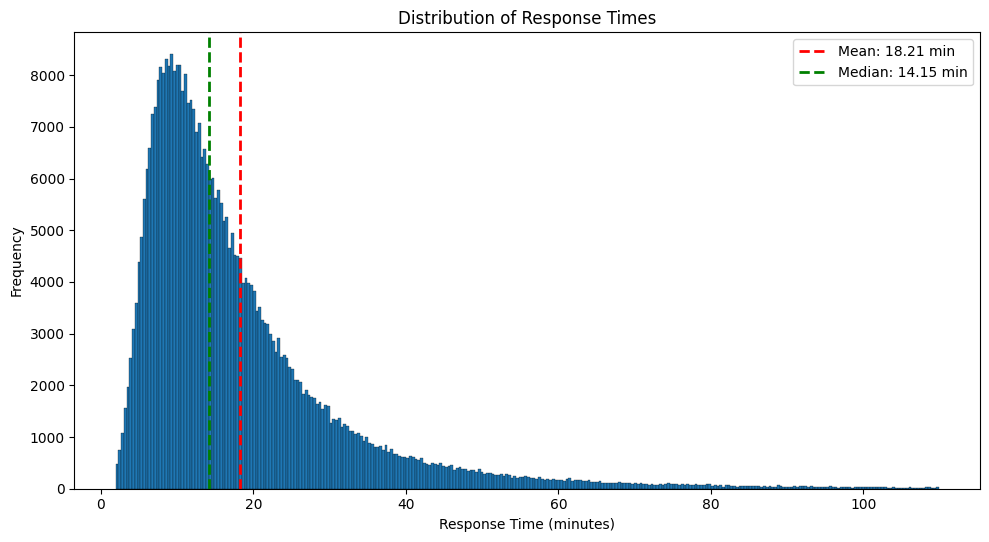

In [ ]:
enhanced_df = data_loader.enhanced_incidents_df
df['response_time_min'] = df['response_time_sec'] / 60.0
mean_response_time = np.mean(enhanced_df['response_time_min'])
median_response_time = np.median(enhanced_df['response_time_min'])

# Filtered original scale data converted back from minutes to seconds for consistency
plt.figure(figsize=(10, 6))
plt.axvline(mean_response_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_response_time:.2f} min')
plt.axvline(median_response_time, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_response_time:.2f} min')

plt.hist(enhanced_df['response_time_min'], bins=300, edgecolor='black', linewidth=0.2)  # Convert back to seconds
plt.xlabel('Response Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times')
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('./plots/mean_median_distribution.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

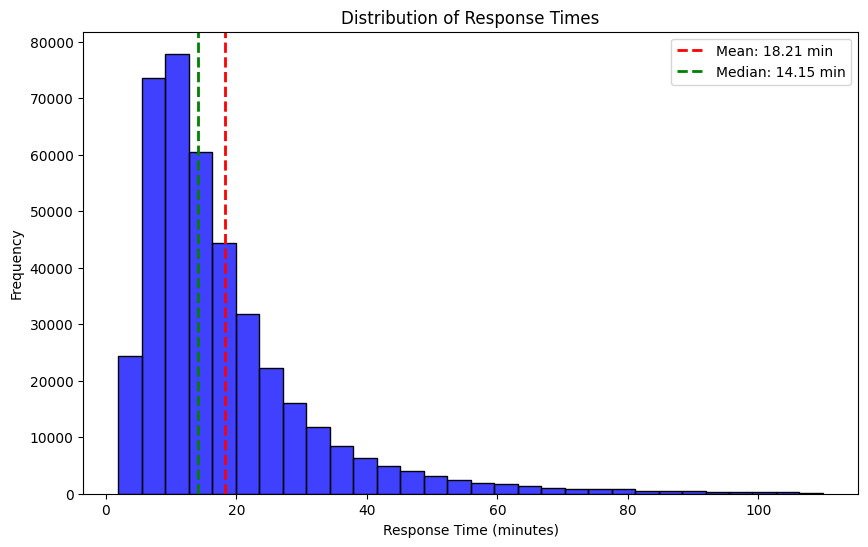

In [ ]:
# Calculate the mean and median
mean_response_time = np.mean(enhanced_df['response_time_min'])
median_response_time = np.median(enhanced_df['response_time_min'])

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(enhanced_df['response_time_min'], bins=30, kde=False, color='blue')

# Plot vertical lines for mean and median
plt.axvline(mean_response_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_response_time:.2f} min')
plt.axvline(median_response_time, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_response_time:.2f} min')

# Add labels and title
plt.xlabel('Response Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times')
plt.legend()

# Show the plot
plt.show()

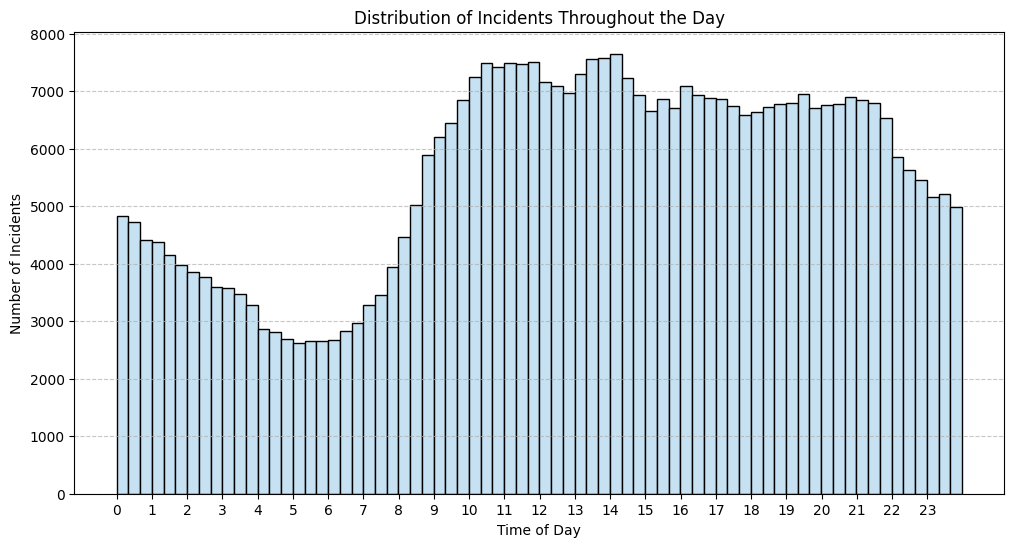

In [ ]:
df_enhanced = data_loader.enhanced_incidents_df

# Convert 'time_call_received' to datetime format
df_enhanced['time_call_received'] = pd.to_datetime(df_enhanced['time_call_received'])

# Extract the minute of the day (from 0 to 1439)
df_enhanced['minute_of_day'] = df_enhanced['time_call_received'].dt.hour * 60 + df_enhanced['time_call_received'].dt.minute

# Plotting
plt.figure(figsize=(12, 6))

palette = sns.color_palette("cubehelix")  # "husl" is just an example, and 2 is the number of colors you want


plt.hist(df_enhanced['minute_of_day'], bins=72, color=palette[5], edgecolor='black')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Incidents Throughout the Day')

# Adjust x-ticks to represent hours
plt.xticks(range(0, 1440, 60), labels=range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

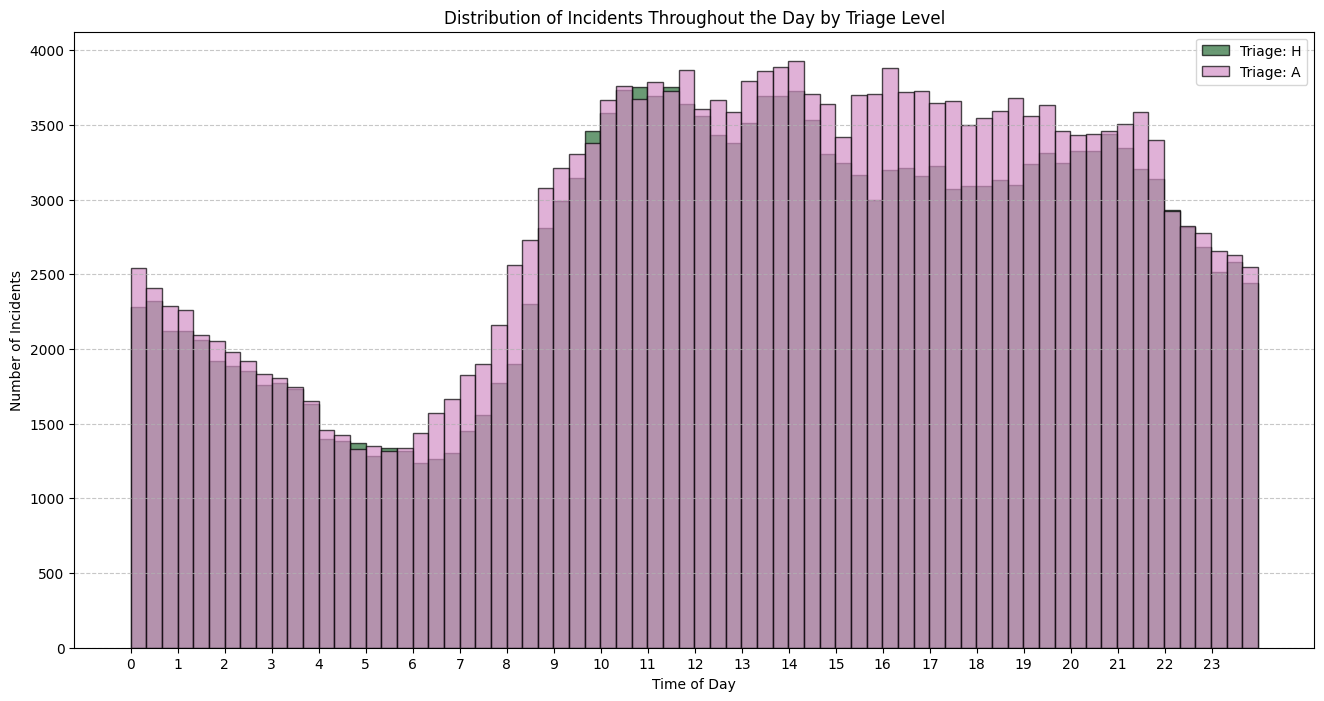

In [ ]:
# Load your data (replace with your actual data loading function)
df_enhanced = data_loader.enhanced_incidents_df

# Convert 'time_call_received' to datetime format
df_enhanced['time_call_received'] = pd.to_datetime(df_enhanced['time_call_received'])

# Extract the minute of the day (from 0 to 1439)
df_enhanced['minute_of_day'] = df_enhanced['time_call_received'].dt.hour * 60 + df_enhanced['time_call_received'].dt.minute

# Prepare color palette
palette = sns.color_palette("cubehelix", n_colors=df_enhanced['triage_impression_during_call'].nunique())

# Plotting
plt.figure(figsize=(16, 8))

for idx, (triage, color) in enumerate(zip(df_enhanced['triage_impression_during_call'].unique(), palette)):
    subset = df_enhanced[df_enhanced['triage_impression_during_call'] == triage]
    plt.hist(subset['minute_of_day'], bins=72, color=color, edgecolor='black', alpha=0.7, label=f'Triage: {triage}')

plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Incidents Throughout the Day by Triage Level')

# Adjust x-ticks to represent hours
plt.xticks(range(0, 1440, 60), labels=range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()


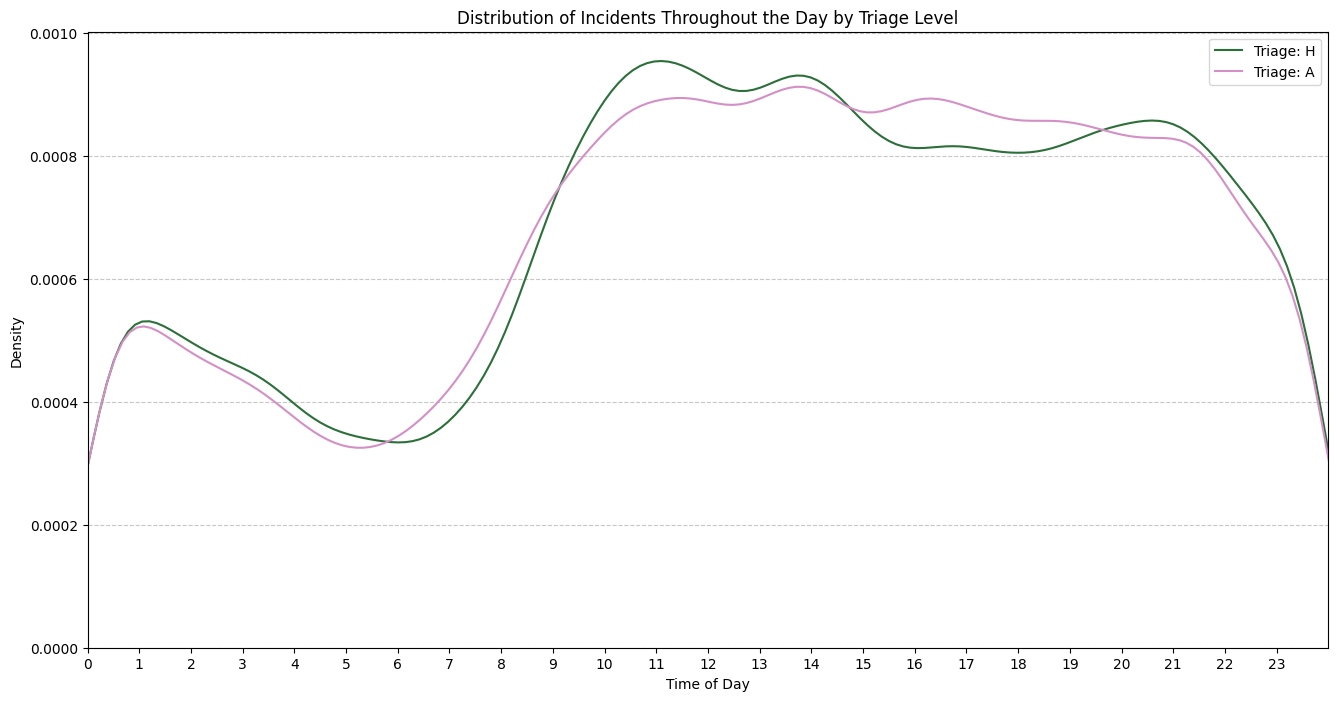

In [ ]:
# Load your data (replace with your actual data loading function)
df_enhanced = data_loader.enhanced_incidents_df

# Convert 'time_call_received' to datetime format
df_enhanced['time_call_received'] = pd.to_datetime(df_enhanced['time_call_received'])

# Extract the minute of the day (from 0 to 1439)
df_enhanced['minute_of_day'] = df_enhanced['time_call_received'].dt.hour * 60 + df_enhanced['time_call_received'].dt.minute

# Prepare color palette
palette = sns.color_palette("cubehelix", n_colors=df_enhanced['triage_impression_during_call'].nunique())

# Plotting
plt.figure(figsize=(16, 8))

for idx, (triage, color) in enumerate(zip(df_enhanced['triage_impression_during_call'].unique(), palette)):
    subset = df_enhanced[df_enhanced['triage_impression_during_call'] == triage]
    sns.kdeplot(subset['minute_of_day'], color=color, label=f'Triage: {triage}')

plt.xlabel('Time of Day')
plt.ylabel('Density')
plt.title('Distribution of Incidents Throughout the Day by Triage Level')

# Adjust x-ticks and x-limits to represent hours
plt.xticks(range(0, 1440, 60), labels=range(0, 24))
plt.xlim(0, 1439)  # This line sets the x-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('./plots/triage_distribution throughout_day_by_triage.png', format='png', dpi=300, bbox_inches='tight')

plt.legend()
plt.show()


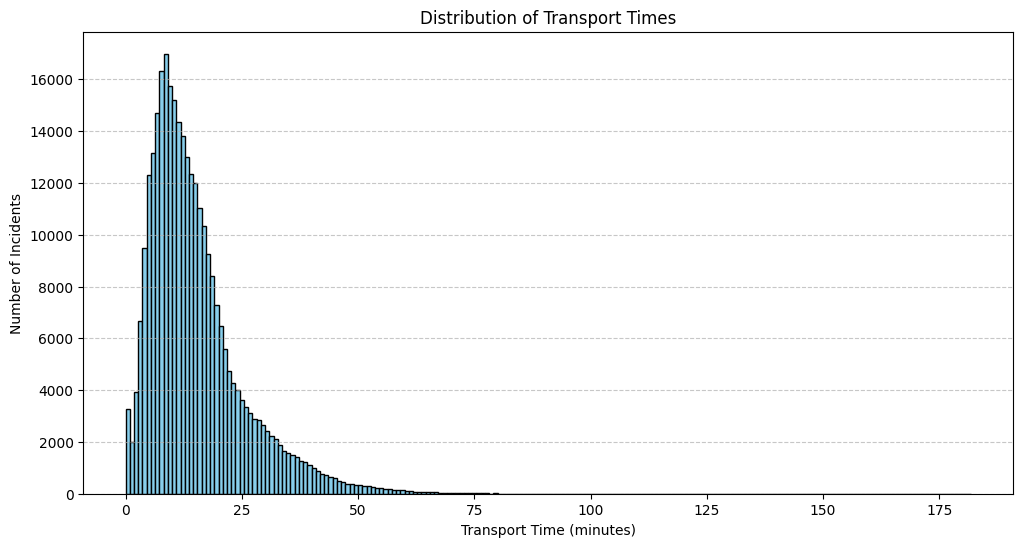

In [ ]:
# Load your data (replace with your actual data loading function)
df_enhanced = data_loader.enhanced_incidents_df

# Convert relevant time columns to datetime format
df_enhanced['time_departure_scene'] = pd.to_datetime(df_enhanced['time_departure_scene'])
df_enhanced['time_arrival_hospital'] = pd.to_datetime(df_enhanced['time_arrival_hospital'])

# Calculate transport time in minutes
df_enhanced['transport_time_minutes'] = (df_enhanced['time_arrival_hospital'] - df_enhanced['time_departure_scene']).dt.total_seconds() / 60

# Remove NaN and negative values, if any
df_enhanced = df_enhanced[df_enhanced['transport_time_minutes'].notna()]
df_enhanced = df_enhanced[df_enhanced['transport_time_minutes'] >= 0]

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(df_enhanced['transport_time_minutes'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Transport Time (minutes)')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Transport Times')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
long_transports = df_enhanced[df_enhanced['transport_time_minutes'] > 120]

# Display these records for manual review
print(long_transports[['time_departure_scene', 'time_arrival_hospital', 'transport_time_minutes']])

       time_departure_scene time_arrival_hospital  transport_time_minutes
18721   2018-07-25 11:51:59   2018-07-25 14:21:59              150.000000
193943  2017-05-21 18:41:56   2017-05-21 20:43:15              121.316667
291409  2015-03-26 12:38:26   2015-03-26 14:50:05              131.650000
295078  2018-03-20 03:37:46   2018-03-20 06:00:00              142.233333
368281  2016-01-16 20:35:50   2016-01-16 23:37:39              181.816667
397838  2018-09-05 16:27:36   2018-09-05 19:02:28              154.866667


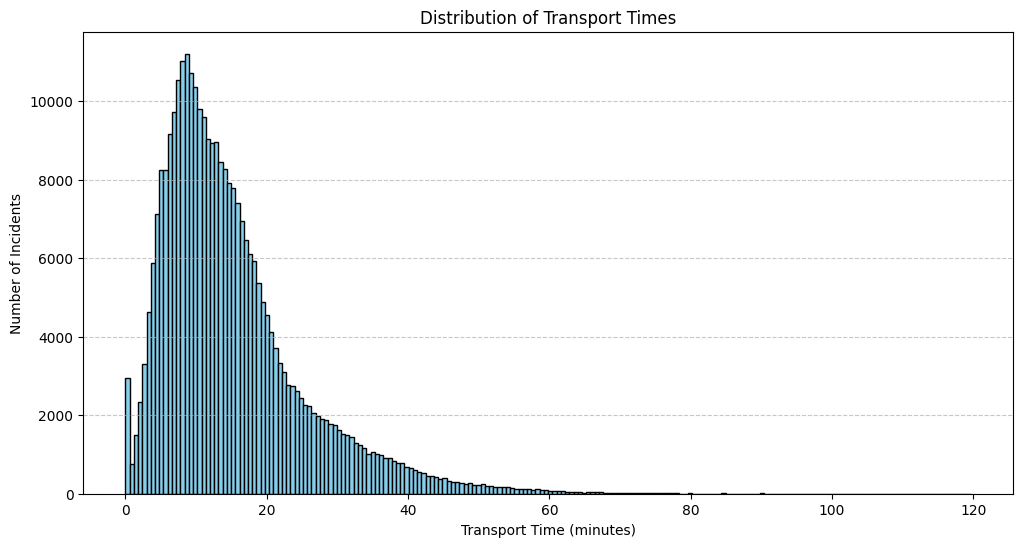

In [ ]:
# Load your data (replace with your actual data loading function)
df_enhanced = data_loader.enhanced_incidents_df

# Convert relevant time columns to datetime format
df_enhanced['time_departure_scene'] = pd.to_datetime(df_enhanced['time_departure_scene'])
df_enhanced['time_arrival_hospital'] = pd.to_datetime(df_enhanced['time_arrival_hospital'])

# Calculate transport time in minutes
df_enhanced['transport_time_minutes'] = (df_enhanced['time_arrival_hospital'] - df_enhanced['time_departure_scene']).dt.total_seconds() / 60

df_enhanced = df_enhanced[df_enhanced['transport_time_minutes'] < 120]

# Remove NaN and negative values, if any
df_enhanced = df_enhanced[df_enhanced['transport_time_minutes'].notna()]
df_enhanced = df_enhanced[df_enhanced['transport_time_minutes'] >= 0]

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(df_enhanced['transport_time_minutes'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Transport Time (minutes)')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Transport Times')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# Convert all relevant time columns to datetime format
time_columns = ['time_call_received', 'time_call_processed', 'time_ambulance_notified', 'time_dispatch',
                'time_arrival_scene', 'time_departure_scene', 'time_arrival_hospital', 'time_available']

for col in time_columns:
    df_enhanced[col] = pd.to_datetime(df_enhanced[col])

# Calculate the durations for each step
df_enhanced['call_processing_time'] = (df_enhanced['time_call_processed'] - df_enhanced['time_call_received']).dt.total_seconds() / 60
df_enhanced['ambulance_notification_time'] = (df_enhanced['time_ambulance_notified'] - df_enhanced['time_call_processed']).dt.total_seconds() / 60
df_enhanced['time_to_dispatch'] = (df_enhanced['time_dispatch'] - df_enhanced['time_ambulance_notified']).dt.total_seconds() / 60
df_enhanced['time_to_arrival_at_scene'] = (df_enhanced['time_arrival_scene'] - df_enhanced['time_dispatch']).dt.total_seconds() / 60
df_enhanced['time_at_scene'] = (df_enhanced['time_departure_scene'] - df_enhanced['time_arrival_scene']).dt.total_seconds() / 60
df_enhanced['transport_time'] = (df_enhanced['time_arrival_hospital'] - df_enhanced['time_departure_scene']).dt.total_seconds() / 60
df_enhanced['time_to_free_up'] = (df_enhanced['time_available'] - df_enhanced['time_arrival_hospital']).dt.total_seconds() / 60

# Calculate the mean and median for each step
mean_times = df_enhanced[['call_processing_time', 'ambulance_notification_time', 'time_to_dispatch',
                          'time_to_arrival_at_scene', 'time_at_scene', 'transport_time', 'time_to_free_up']].mean()

median_times = df_enhanced[['call_processing_time', 'ambulance_notification_time', 'time_to_dispatch',
                            'time_to_arrival_at_scene', 'time_at_scene', 'transport_time', 'time_to_free_up']].median()


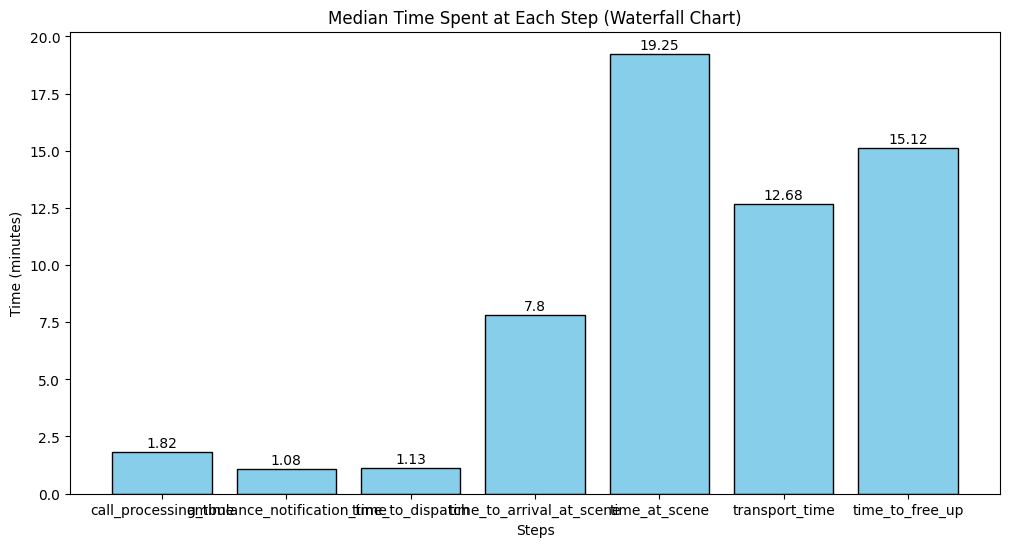

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(median_times.index, median_times, color='skyblue', edgecolor='black')
plt.title('Median Time Spent at Each Step (Waterfall Chart)')
plt.xlabel('Steps')
plt.ylabel('Time (minutes)')
for i, v in enumerate(median_times):
    plt.text(i, v + 0.2, str(round(v, 2)), ha='center')
plt.show()

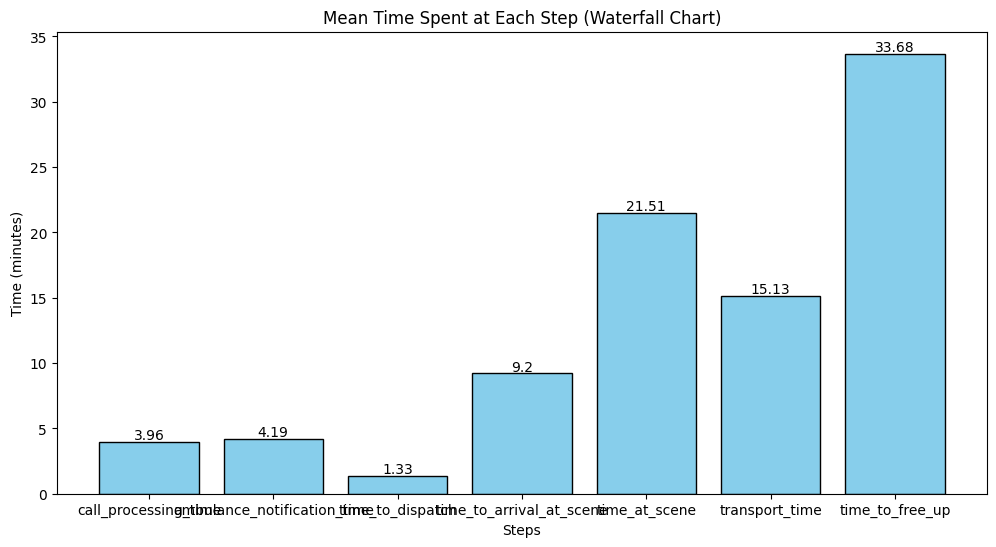

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(mean_times.index, mean_times, color='skyblue', edgecolor='black')
plt.title('Mean Time Spent at Each Step (Waterfall Chart)')
plt.xlabel('Steps')
plt.ylabel('Time (minutes)')
for i, v in enumerate(mean_times):
    plt.text(i, v + 0.2, str(round(v, 2)), ha='center')
plt.show()

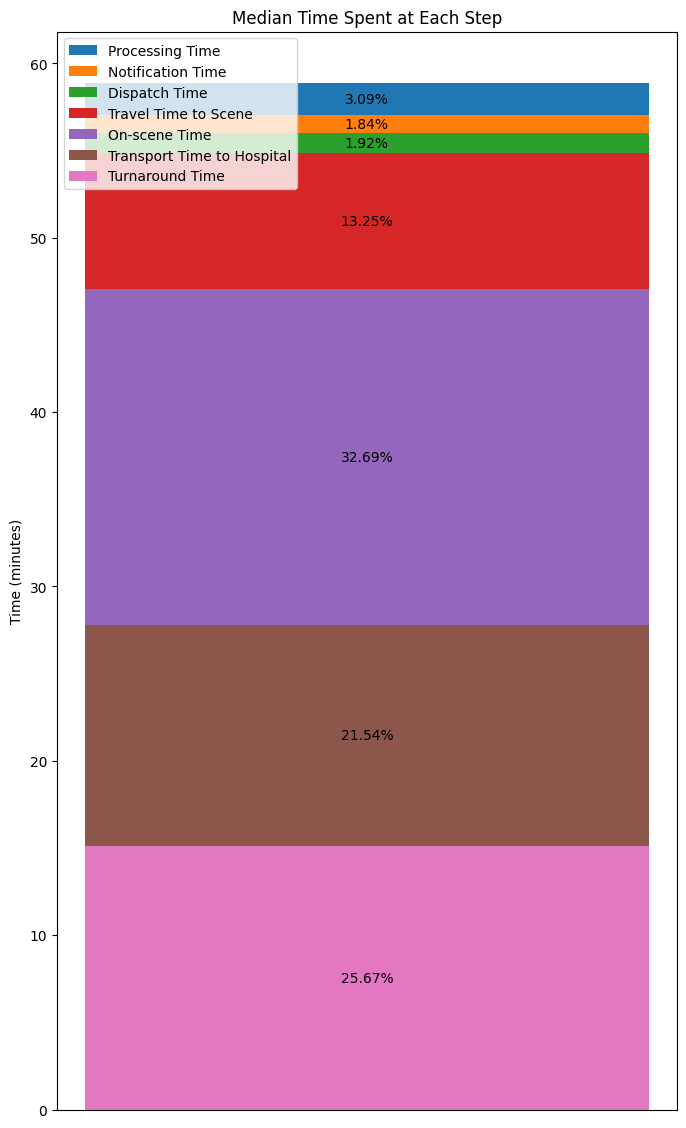

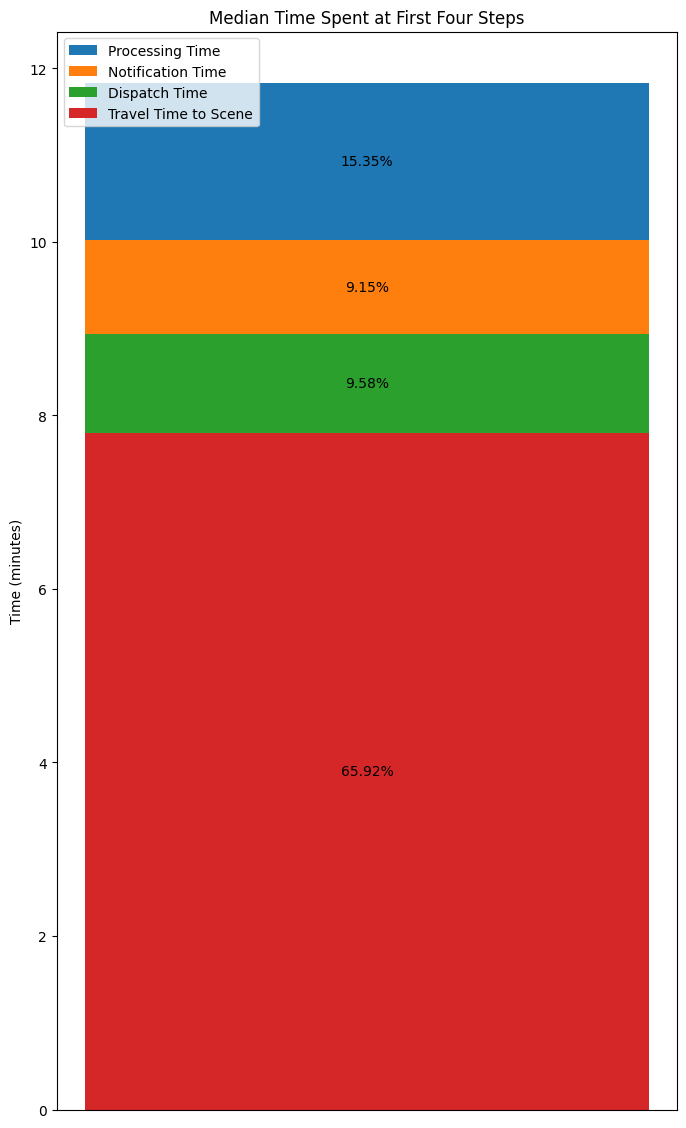

In [ ]:
# Function to plot an inverted vertical stacked bar chart for median times with overlay percentages
def plot_inverted_vertical_stacked_bar_with_percentages(labels, values, title, path):
    fig, ax = plt.subplots(figsize=(8, 14))
    
    # Calculate total time to get percentages
    total_time = np.sum(values)
    
    # Create an array to store the top values for the bars
    top_values = np.array([total_time])
    
    # Create a variable to store the current top position for percentage text
    current_top = total_time
    
    for label, value in zip(labels, values):
        ax.bar(0, value, label=label, bottom=top_values[-1] - value)
        top_values = np.append(top_values, top_values[-1] - value)
        
        # Calculate and display the percentage
        percentage = (value / total_time) * 100
        plt.text(0, current_top - value / 2, f"{round(percentage, 2)}%", ha='center', va='center')
        
        # Update the current top position for the next iteration
        current_top -= value
    
    ax.set_title(title)
    ax.set_ylabel('Time (minutes)')
    ax.set_xticks([])  # Remove x-ticks as there's only one category
    ax.legend(loc='upper left')
    
    plt.savefig(path, format='png', dpi=300, bbox_inches='tight')

    plt.show()
    
path = './plots/temporal_distribution.png'
path2 = './plots/temporal_distribution_first_four.png'
new_labels = ["Processing Time", "Notification Time", "Dispatch Time", "Travel Time to Scene", "On-scene Time", "Transport Time to Hospital", "Turnaround Time"]
# Plotting the inverted vertical stacked bar chart for median times for all steps with overlay percentages
plot_inverted_vertical_stacked_bar_with_percentages(new_labels, median_times.values, 'Median Time Spent at Each Step', path)

# Plotting the inverted vertical stacked bar chart for median times for the first four steps with overlay percentages
plot_inverted_vertical_stacked_bar_with_percentages(new_labels[:4], median_times.values[:4], 'Median Time Spent at First Four Steps', path2)


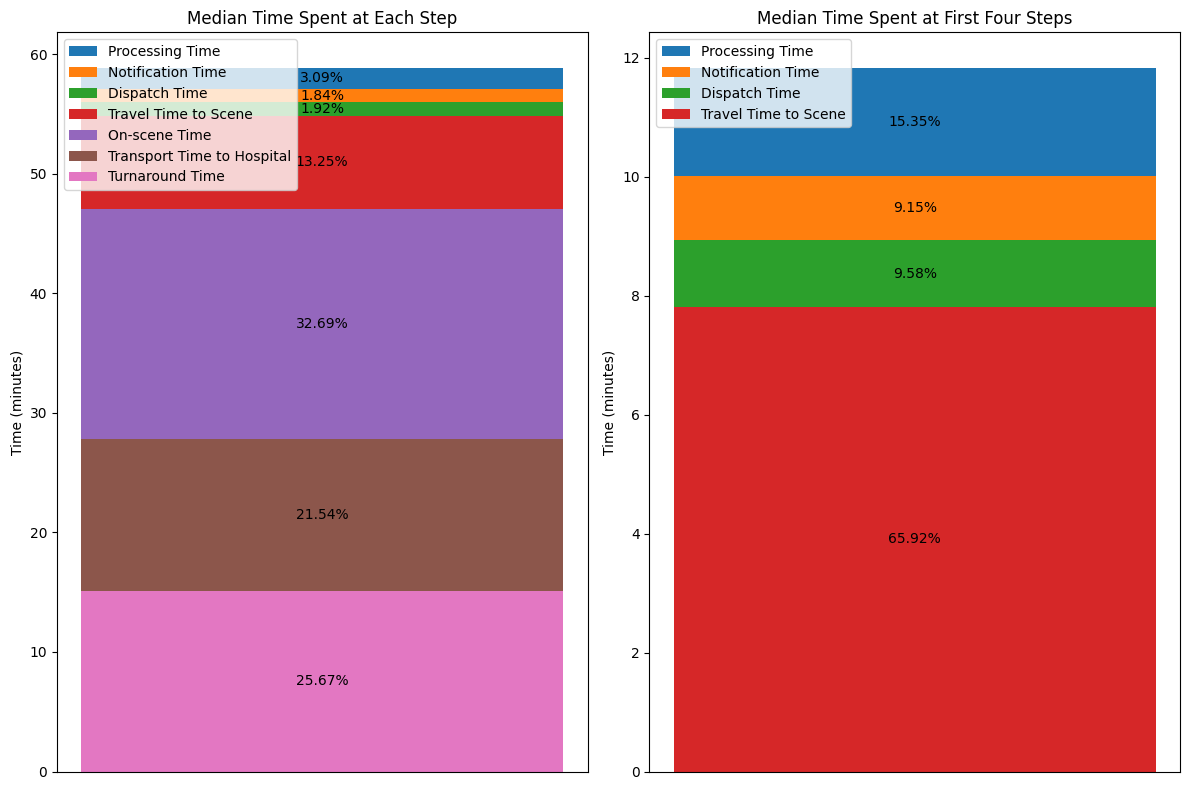

In [ ]:
labels_all_steps = ["Processing Time", "Notification Time", "Dispatch Time", "Travel Time to Scene", "On-scene Time", "Transport Time to Hospital", "Turnaround Time"]
labels_first_four = labels_all_steps[:4]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Function to plot an inverted vertical stacked bar chart for median times with overlay percentages
def plot_inverted_vertical_stacked_bar_with_percentages(ax, labels, values, title):
    # Calculate total time to get percentages
    total_time = sum(values)
    
    # Create an array to store the top values for the bars
    top_values = np.array([total_time])
    
    # Create a variable to store the current top position for percentage text
    current_top = total_time
    
    for label, value in zip(labels, values):
        ax.bar(0, value, label=label, bottom=top_values[-1] - value)
        top_values = np.append(top_values, top_values[-1] - value)
        
        # Calculate and display the percentage
        percentage = (value / total_time) * 100
        ax.text(0, current_top - value / 2, f"{round(percentage, 2)}%", ha='center', va='center')
        
        # Update the current top position for the next iteration
        current_top -= value
    
    ax.set_title(title)
    ax.set_ylabel('Time (minutes)')
    ax.set_xticks([])  # Remove x-ticks as there's only one category
    ax.legend(loc='upper left')

# Plotting the inverted vertical stacked bar chart for median times for all steps with overlay percentages
plot_inverted_vertical_stacked_bar_with_percentages(axs[0], labels_all_steps, median_times, 'Median Time Spent at Each Step')

# Plotting the inverted vertical stacked bar chart for median times for the first four steps with overlay percentages
plot_inverted_vertical_stacked_bar_with_percentages(axs[1], labels_first_four, median_times[:4], 'Median Time Spent at First Four Steps')

plt.tight_layout()
plt.savefig('./plots/temporal_distributions.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

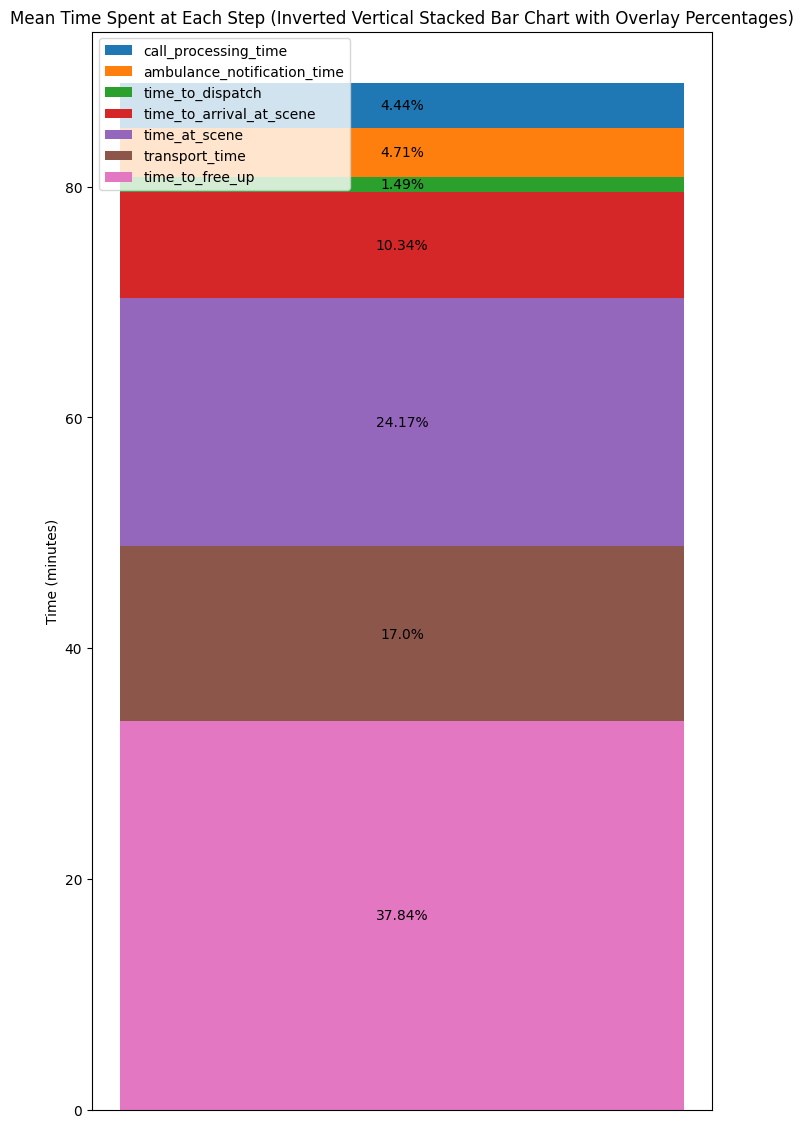

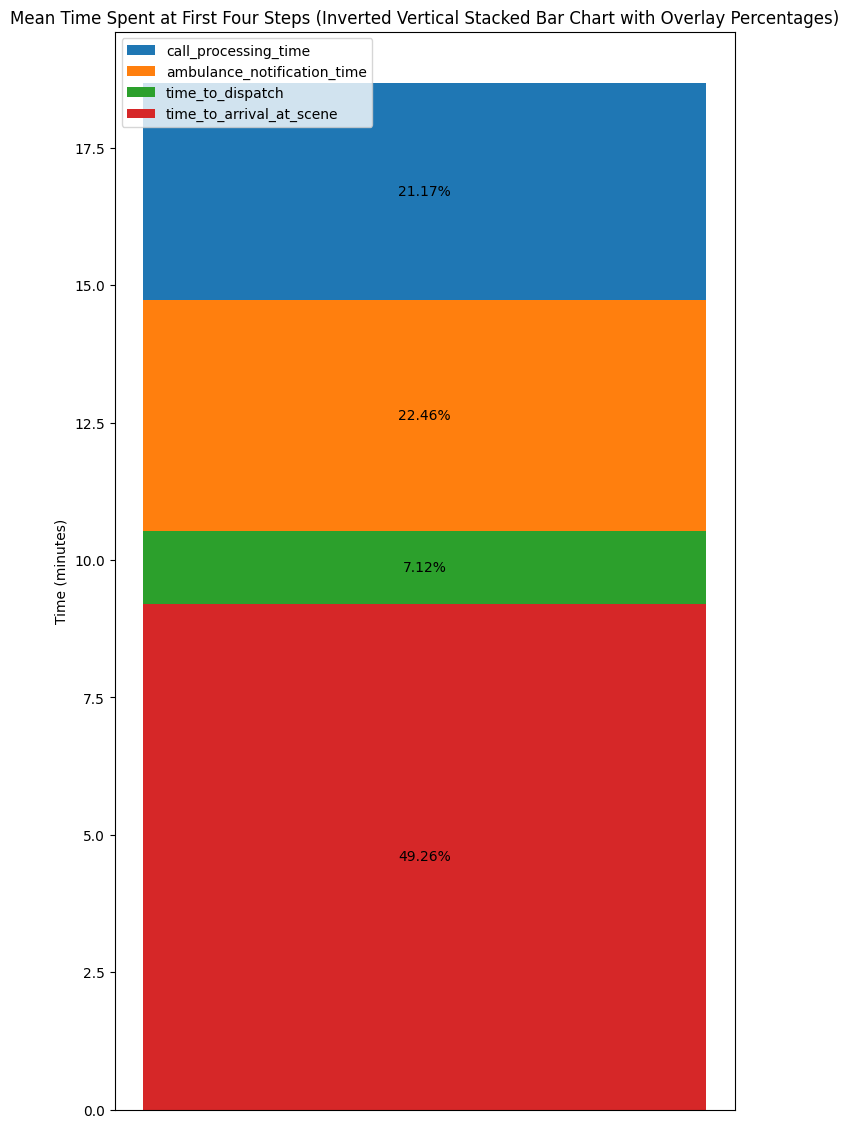

In [ ]:
# Function to plot an inverted vertical stacked bar chart for median times with overlay percentages
def plot_inverted_vertical_stacked_bar_with_percentages(labels, values, title):
    fig, ax = plt.subplots(figsize=(8, 14))
    
    # Calculate total time to get percentages
    total_time = np.sum(values)
    
    # Create an array to store the top values for the bars
    top_values = np.array([total_time])
    
    # Create a variable to store the current top position for percentage text
    current_top = total_time
    
    for label, value in zip(labels, values):
        ax.bar(0, value, label=label, bottom=top_values[-1] - value)
        top_values = np.append(top_values, top_values[-1] - value)
        
        # Calculate and display the percentage
        percentage = (value / total_time) * 100
        plt.text(0, current_top - value / 2, f"{round(percentage, 2)}%", ha='center', va='center')
        
        # Update the current top position for the next iteration
        current_top -= value
    
    ax.set_title(title)
    ax.set_ylabel('Time (minutes)')
    ax.set_xticks([])  # Remove x-ticks as there's only one category
    ax.legend(loc='upper left')
    
    plt.show()

# Plotting the inverted vertical stacked bar chart for median times for all steps with overlay percentages
plot_inverted_vertical_stacked_bar_with_percentages(mean_times.index, mean_times.values, 'Mean Time Spent at Each Step (Inverted Vertical Stacked Bar Chart with Overlay Percentages)')

# Plotting the inverted vertical stacked bar chart for median times for the first four steps with overlay percentages
plot_inverted_vertical_stacked_bar_with_percentages(mean_times.index[:4], mean_times.values[:4], 'Mean Time Spent at First Four Steps (Inverted Vertical Stacked Bar Chart with Overlay Percentages)')


C:\Users\torju\AppData\Local\Temp\ipykernel_11324\121601085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_impression_during_call', y='response_time_min', data=df_enhanced, palette="coolwarm", whis=[0,100])


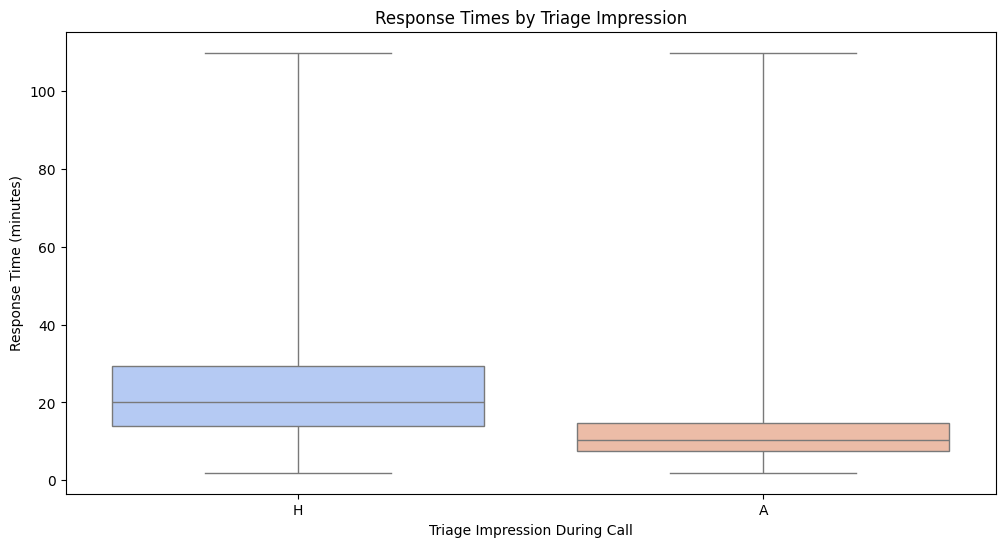

In [ ]:
df_enhanced = data_loader.enhanced_incidents_df

df_enhanced['response_time_min'] = df_enhanced['response_time_sec'] / 60

# Create the boxplot for the actual data
plt.figure(figsize=(12, 6))
sns.boxplot(x='triage_impression_during_call', y='response_time_min', data=df_enhanced, palette="coolwarm", whis=[0,100])
plt.title('Response Times by Triage Impression')
plt.xlabel('Triage Impression During Call')
plt.ylabel('Response Time (minutes)')

plt.savefig('./plots/box_plot.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\torju\AppData\Local\Temp\ipykernel_11324\3050404616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response_time_min'] = df['response_time_sec'] / 60


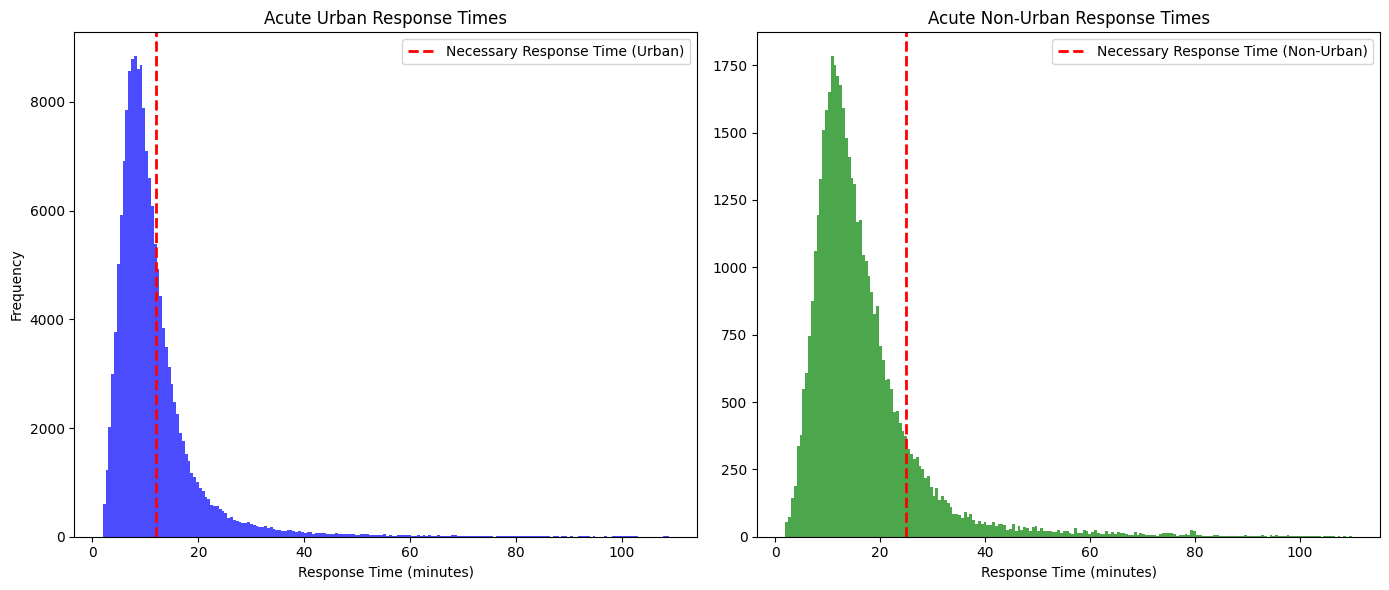

In [ ]:
# Assuming df is your DataFrame and it has 'response_time' and 'urban' columns
df = data_loader.enhanced_incidents_df

df = df[df['triage_impression_during_call'] == 'A']

# Convert response times from seconds to minutes
df['response_time_min'] = df['response_time_sec'] / 60

# Filter the DataFrame into urban and non-urban
urban_df = df[df['urban_settlement'] == True]
non_urban_df = df[df['urban_settlement'] == False]

# Now let's create the histograms
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for urban response times
axs[0].hist(urban_df['response_time_min'], bins=200, color='blue', alpha=0.7)
axs[0].axvline(12, color='red', linestyle='--', linewidth=2, label='Necessary Response Time (Urban)')
axs[0].set_title('Acute Urban Response Times')
axs[0].set_xlabel('Response Time (minutes)')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Histogram for non-urban response times
axs[1].hist(non_urban_df['response_time_min'], bins=200, color='green', alpha=0.7)
axs[1].axvline(25, color='red', linestyle='--', linewidth=2, label='Necessary Response Time (Non-Urban)')
axs[1].set_title('Acute Non-Urban Response Times')
axs[1].set_xlabel('Response Time (minutes)')
# Only set ylabel for the first subplot, remove it from the second subplot
# axs[1].set_ylabel('Frequency')  # Remove this line if the ylabel is not needed for the second subplot
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('./plots/acute_response_times.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\torju\AppData\Local\Temp\ipykernel_11324\3970278780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response_time_min'] = df['response_time_sec'] / 60


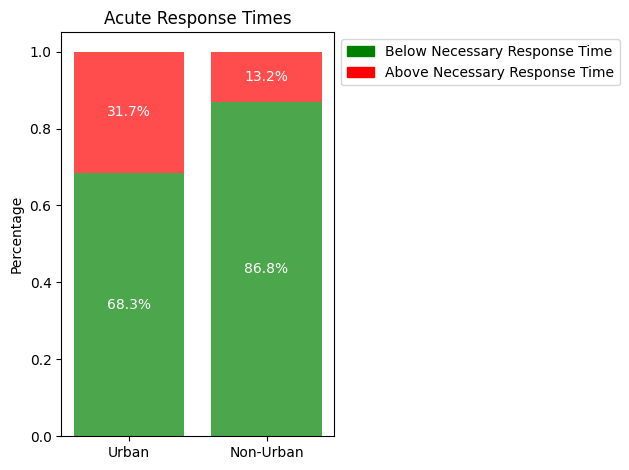

In [ ]:
import matplotlib.patches as mpatches

# Convert seconds to minutes for response times
df['response_time_min'] = df['response_time_sec'] / 60

# Filter for 'Critical' triage impressions and urban settlement
critical_urban_df = df[(df['triage_impression_during_call'] == 'A') & (df['urban_settlement'] == True)]
critical_non_urban_df = df[(df['triage_impression_during_call'] == 'A') & (df['urban_settlement'] == False)]

# Calculate percentages
urban_below_percentage = (critical_urban_df['response_time_min'] <= 12).mean()
non_urban_below_percentage = (critical_non_urban_df['response_time_min'] <= 25).mean()

# Data for plotting
categories = ['Urban', 'Non-Urban']
below_percentages = [urban_below_percentage, non_urban_below_percentage]
above_percentages = [1 - urban_below_percentage, 1 - non_urban_below_percentage]

# Plot stacked bar charts
fig, ax = plt.subplots()
urban_bars = ax.bar(categories[0], below_percentages[0], color='green', alpha=0.7)
non_urban_bars = ax.bar(categories[1], below_percentages[1], color='green', alpha=0.7)
ax.bar(categories, above_percentages, bottom=below_percentages, color='red', alpha=0.7)

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title('Acute Response Times')

# Create custom legend
green_patch = mpatches.Patch(color='green', label='Below Necessary Response Time')
red_patch = mpatches.Patch(color='red', label='Above Necessary Response Time')

# Place the legend outside of the plot to the right
ax.legend(handles=[green_patch, red_patch], loc='upper left', bbox_to_anchor=(1,1))

# Adding the text on the bars
for category, below, above in zip(categories, below_percentages, above_percentages):
    ax.text(category, below / 2, f'{below:.1%}', ha='center', va='center', color='white')
    ax.text(category, below + (above / 2), f'{above:.1%}', ha='center', va='center', color='white')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.savefig('./plots/percentage_acute_times.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
median_urban = df[df['urban_settlement']]['response_time_min'].median()
median_non_urban = df[~df['urban_settlement']]['response_time_min'].median()

median_urban, median_non_urban

(nan, nan)

C:\Users\torju\AppData\Local\Temp\ipykernel_11324\1461648299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response_time_min'] = df['response_time_sec'] / 60
C:\Users\torju\AppData\Local\Temp\ipykernel_11324\1461648299.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['time_call_received'].dt.year


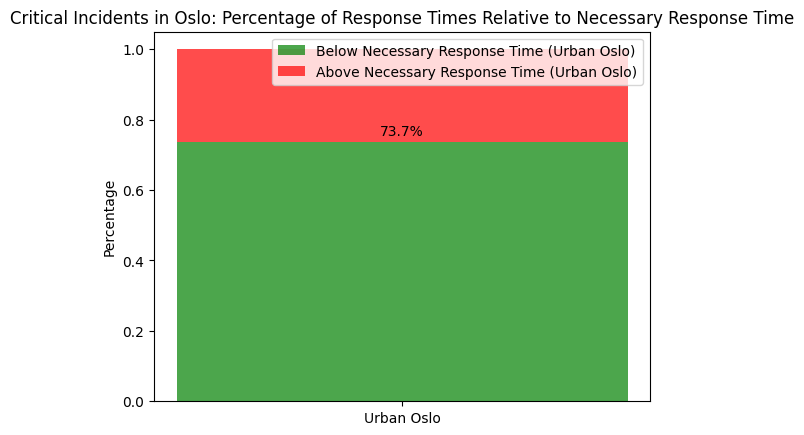

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the necessary columns
# Convert seconds to minutes for response times
df['response_time_min'] = df['response_time_sec'] / 60

# Extract the year from the datetime column
df['year'] = df['time_call_received'].dt.year

# Filter for 'Critical' triage impressions, urban settlement, and region = Oslo
critical_urban_oslo_df = df[(df['triage_impression_during_call'] == 'A') & 
                            (df['year'] == 2018) &
                            (df['region'] == 'Oslo') &
                            (df['urban_settlement'] == True)]

# Calculate percentages
urban_below_percentage = (critical_urban_oslo_df['response_time_min'] <= 12).mean()

# Data for plotting
categories = ['Urban Oslo']
below_percentages = [urban_below_percentage]
above_percentages = [1 - urban_below_percentage]

# Plot stacked bar charts
fig, ax = plt.subplots()
urban_bars = ax.bar(categories[0], below_percentages[0], label='Below Necessary Response Time (Urban Oslo)', color='green', alpha=0.7)
ax.bar(categories, above_percentages, bottom=below_percentages, label='Above Necessary Response Time (Urban Oslo)', color='red', alpha=0.7)

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title('Critical Incidents in Oslo: Percentage of Response Times Relative to Necessary Response Time')
ax.legend()

# Adding the text on the bars
for bar in urban_bars:
    ax.annotate(f'{below_percentages[0]:.1%}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
